In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math
import cmath
%matplotlib inline
# to render images in gray 
plt.gray()

<Figure size 432x288 with 0 Axes>

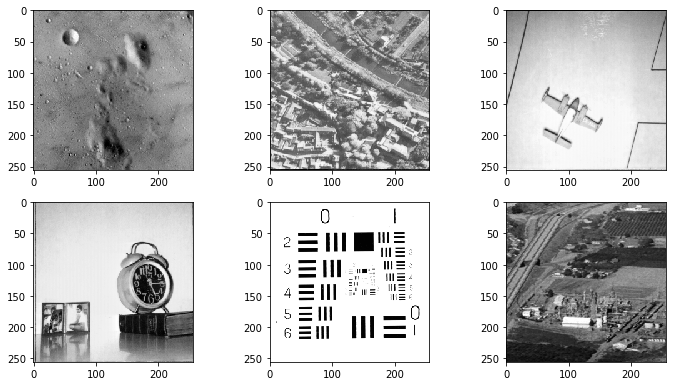

In [2]:
# http://sipi.usc.edu/database/database.php?volume=misc&image=14#top
moon_surface = mpimg.imread('5.1.09.tiff')
# http://sipi.usc.edu/database/database.php?volume=misc&image=15#top
aerial = mpimg.imread('5.1.10.tiff')
# http://sipi.usc.edu/database/database.php?volume=misc&image=16#top
airplane = mpimg.imread('5.1.11.tiff')
# http://sipi.usc.edu/database/database.php?volume=misc&image=17#top
clock = mpimg.imread('5.1.12.tiff')
# http://sipi.usc.edu/database/database.php?volume=misc&image=18#top
resolution_chart = mpimg.imread('5.1.13.tiff')
# http://sipi.usc.edu/database/database.php?volume=misc&image=19#top
chemical_plant = mpimg.imread('5.1.14.tiff')
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(3,3,1)
ax.imshow(moon_surface)
ax = fig.add_subplot(3,3,2)
ax.imshow(aerial)
ax = fig.add_subplot(3,3,3)
ax.imshow(airplane)
ax = fig.add_subplot(3,3,4)
ax.imshow(clock)
ax = fig.add_subplot(3,3,5)
ax.imshow(resolution_chart)
ax = fig.add_subplot(3,3,6)
ax.imshow(chemical_plant)

Using cropped images since DFT operations are computationally expensive

(80, 80)

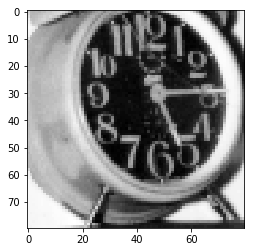

In [3]:
clock_cropped = clock[100:180,140:220]
plt.imshow(clock_cropped)
clock_cropped.shape

(100, 100)

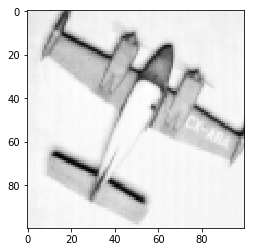

In [4]:
airplane_cropped = airplane[125:225,50:150]
plt.imshow(airplane_cropped)
airplane_cropped.shape

(100, 100)

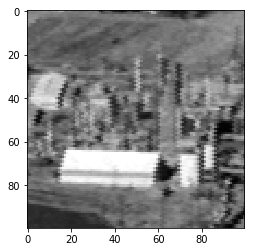

In [5]:
chemical_plant_cropped = chemical_plant[120:220,75:175]
plt.imshow(chemical_plant_cropped)
chemical_plant_cropped.shape

# 1) 2D-DFT

Recall the definition of the 2D-DFT from class. Assume that you are working with square images. Write a program
that implements the DFT/IDFT pair using the following techniques.

1. From first principles i.e., as a summation over two dimensions.

In [6]:
# Discrete Fourier Transform
# Analysis equation
def DFT(image):
    height, width = image.shape[0], image.shape[1]
    DFT_coefficients_matrix = np.zeros((height, width),dtype = "complex_")
    for u in range(height):
        #print(u, end=' ')
        for v in range(width):
            for row in range(height):
                for col in range(width):
#                     z = cmath.exp(- 2j * math.pi *((u*row)/height + (v*col)/width))
                    z = complex(0, ((u*row)/height) + ((v*col)/width))
                    DFT_coefficients_matrix[u][v] += image[row][col]*np.exp(-2*math.pi*z)
                    #DFT_coefficients_matrix[u][v] += image[row][col]*z
    return DFT_coefficients_matrix

In [7]:
# Inverse Discrete Fourier Transform
# Synthesis equation
def IDFT(DFT_coefficients_matrix):
    height, width = DFT_coefficients_matrix.shape[0], DFT_coefficients_matrix.shape[1]
    image = np.zeros((height, width), dtype = "complex_")
    for row in range(height):
        #print(row, end=' ')
        for col in range(width):
            for u in range(height):
                for v in range(width):
#                     z = cmath.exp(- 2j * math.pi *((-1*u*row)/height + (-1*v*col)/width))
                    z = complex(0, ((-u*row)/height) + ((-v*col)/width))
                    image[row][col] += DFT_coefficients_matrix[u][v]*np.exp(-2*math.pi*z)
                    #image[row][col] += DFT_coefficients_matrix[u][v]*z
            image[row][col] /= (height*width)
    return image

2. Matrix multiplication using the complex exponential matrix.

In [8]:
# for square matrix
def DFT_using_matrix_multiplication(image):
    height, width = image.shape[0], image.shape[1]
    basis_matrix = np.zeros((height, width), dtype = "complex_")
    for row in range(height):
        for col in range(width):
            z = complex(0, -(2*math.pi*row*col)/width)
            basis_matrix[row][col] = np.exp(z)
    DFT_coefficients_matrix = np.zeros((height, width))
    DFT_coefficients_matrix = np.matmul(basis_matrix, image)
    DFT_coefficients_matrix = np.matmul(DFT_coefficients_matrix, basis_matrix)
    return DFT_coefficients_matrix

In [9]:
# for square matrix
def IDFT_using_matrix_multiplication(DFT_coefficients_matrix):
    height, width = DFT_coefficients_matrix.shape[0], DFT_coefficients_matrix.shape[1]
    basis_matrix = np.zeros((height, width), dtype = "complex_")
    for row in range(height):
        for col in range(width):
            z = complex(0, -(2*math.pi*row*col)/width)
            basis_matrix[row][col] = np.exp(-z)/(height)
    image = np.zeros((height, width))
    image = np.matmul(basis_matrix, DFT_coefficients_matrix)
    image = np.matmul(image, basis_matrix)
    return image

In [10]:
def magnitude_image(image):
    height, width = image.shape[0], image.shape[1]
    magnitude_image = np.zeros((height, width))
    for row in range(height):
        for col in range(width):
            real_val = image[row][col].real
            imag_val = image[row][col].imag
            magnitude_image[row][col] = np.sqrt(real_val**2 + imag_val**2)
    return magnitude_image

In [11]:
def phase_of_image(image):
    height, width = image.shape[0], image.shape[1]
    phase_image = np.zeros((height, width))
    for row in range(height):
        for col in range(width):
            real_val = image[row][col].real
            imag_val = image[row][col].imag
            phase_image[row][col] = np.arctan(imag_val/real_val)
    return phase_image

In [12]:
# linear point operation J = P*I + L
def linear_point_operation(image, P, L):
    height, width = image.shape[0], image.shape[1]
    new_image = np.zeros((height, width))
    for row in range(height):
        for col in range(width):
            new_image[row][col] = P*image[row][col] + L
    return new_image

In [13]:
# log magnitude compression 
def log_compression(image):
    height, width = image.shape[0], image.shape[1]
    log_compressed_image = np.zeros((height, width))
    for row in range(height):
        for col in range(width):
            log_compressed_image[row][col] = np.log2(1+image[row][col])
    return log_compressed_image

In [14]:
# full scale contrast stretch
def FSCS(image):
    height, width = image.shape[0], image.shape[1]
    min_pixel_value = np.min(image)
    max_pixel_value = np.max(image)
    K = 256
    P = (K-1)/(max_pixel_value-min_pixel_value)
    L = (-1*min_pixel_value)*(K-1)/(max_pixel_value-min_pixel_value)
    new_image = linear_point_operation(image, P, L)
    return new_image

1. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

In [15]:
DFT_coefficients_matrix = DFT(clock_cropped)

In [16]:
magnitude_img = np.absolute(DFT_coefficients_matrix)

In [17]:
phase_img = np.angle(DFT_coefficients_matrix)

In [18]:
log_compressed_image = log_compression(magnitude_img)
fscs_image = FSCS(log_compressed_image)

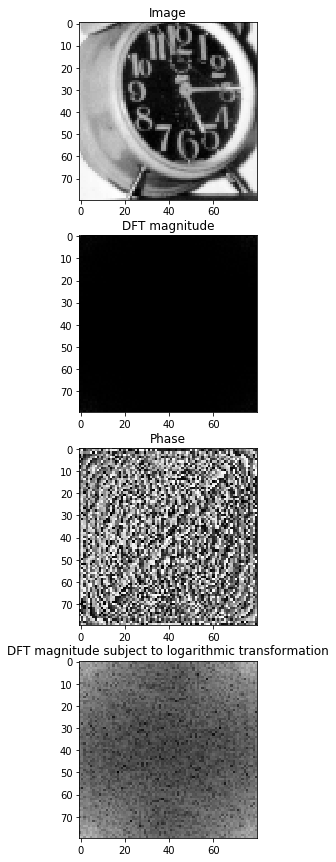

In [19]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(4,1,1)
ax.set_title('Image')
ax.imshow(clock_cropped)
ax = fig.add_subplot(4,1,2)
ax.set_title('DFT magnitude')
ax.imshow(magnitude_img)
ax = fig.add_subplot(4,1,3)
ax.set_title('Phase')
ax.imshow(phase_img)
ax = fig.add_subplot(4,1,4)
ax.set_title('DFT magnitude subject to logarithmic transformation')
ax.imshow(fscs_image)

As we can see above, both magnitude and phase are important in dft coefficients image. Only
magnitude won't suffice, phase is important.

2. Generate the centered DFT using (− 1 ) i + j I and display its magnitude.

In [20]:
# centering DFT TO (0,0) as per standard convention
def centered_DFT(image):
    height, width = image.shape[0], image.shape[1]
    centered_DFT_image = np.zeros((height, width), dtype = "complex_")
    for row in range(height):
        for col in range(width):
            centered_DFT_image[row][col] = image[row][col]*((-1)**(row+col))
    return centered_DFT_image               

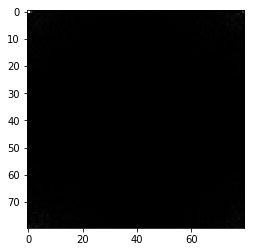

In [21]:
centered_DFT_image = centered_DFT(DFT_coefficients_matrix)
centered_DFT_magnitude_img = np.absolute(centered_DFT_image)
plt.imshow(centered_DFT_magnitude_img)

3. Verify that IDFT[DFT[I]] = I.

In [22]:
idft_dft_image = IDFT(DFT_coefficients_matrix)

In [23]:
def difference_of_image(img_1, img_2):
    height_1, width_1 = img_1.shape[0], img_1.shape[1]
    height_2, width_2 = img_2.shape[0], img_2.shape[1]
    if height_1 != height_2 or width_1 != width_2:
        return False
    epsilon = 0.1
    for row in range(height_1):
        for col in range(width_1):
            if abs(img_1[row][col] - img_2[row][col]) >= epsilon:
                return False
    return True

As we can see below, IDFT(DFT(image)) = image

In [24]:
if difference_of_image(idft_dft_image, clock_cropped):
    print("Images are same")

Images are same


In [25]:
dft_cropped_clock = np.fft.fft2(clock_cropped)
if difference_of_image(DFT_coefficients_matrix, dft_cropped_clock):
    print("Implementation of DFT using summation is correct")

Implementation of DFT using summation is correct


In [26]:
idft_cropped_clock = np.fft.ifft2(dft_cropped_clock)
if difference_of_image(idft_dft_image, idft_cropped_clock):
    print("Implementation of IDFT using summation is correct")

Implementation of IDFT using summation is correct


In [27]:
dft_cropped_clock_matrix_mul = DFT_using_matrix_multiplication(clock_cropped)
if difference_of_image(dft_cropped_clock_matrix_mul, dft_cropped_clock):
    print("Implementation of DFT using matrix multiplication is correct")

Implementation of DFT using matrix multiplication is correct


In [28]:
idft_cropped_clock_matrix_mul = IDFT_using_matrix_multiplication(dft_cropped_clock_matrix_mul)
if difference_of_image(idft_cropped_clock_matrix_mul, idft_cropped_clock):
    print("Implementation of DFT using matrix multiplication is correct")

Implementation of DFT using matrix multiplication is correct


4. Show the importance of phase by transposing the phase matrix and then synthesizing the image. Repeat by
a) setting the phase to 0, and b) by adding noise.

In [29]:
phase_transpose = np.transpose(phase_img)

Using transpose of phase, synthesizing image

In [30]:
# generate DFT coefficient matrix using given magnitude and phase
def DFT_given_magnitude_phase(magnitude, phase):
    height, width = magnitude.shape[0], magnitude.shape[1]
    DFT_coefficients_matrix = np.zeros((height, width), dtype = "complex_")
    for row in range(height):
        for col in range(width):
            r = magnitude[row][col]
            theta = phase[row][col]
            real_part = r * np.cos(theta)
            complex_part = r * np.sin(theta)
            z = complex(real_part, complex_part)
            DFT_coefficients_matrix[row][col] = z
#             z = complex(theta)
#             DFT_coefficients_matrix[row][col] = r*np.exp(z)
    return DFT_coefficients_matrix

In [31]:
# generating DFT using same magnitude but transpose of phase
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, phase_transpose)

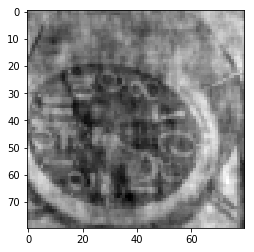

In [32]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is transposed, image almost lost all its details. It appears to be transposed
a little like it appears to be rotated anticlockwise by 90 degree but almost all details are lost

In [33]:
# Calculating DFT using same magnitude but zero phase
height, width = clock_cropped.shape[0], clock_cropped.shape[1]
zero_phase = np.zeros((height, width))
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, zero_phase)

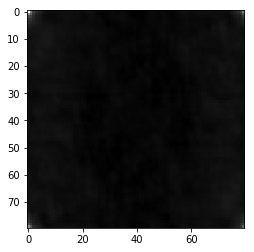

In [34]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is zero, the new synthesized image is black. Hence phase is very important 
in image.

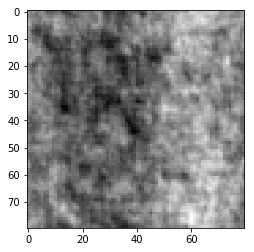

In [35]:
# Adding noise to phase
noise = np.random.normal(0, 2, size=(clock_cropped.shape[0], clock_cropped.shape[1]))
noisy_phase = np.add(phase_img, noise)
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, noisy_phase)
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed in above image, image lost all its details if noisy phase is added.

Performing same operations as above but DFT calculated using matrix multiplication

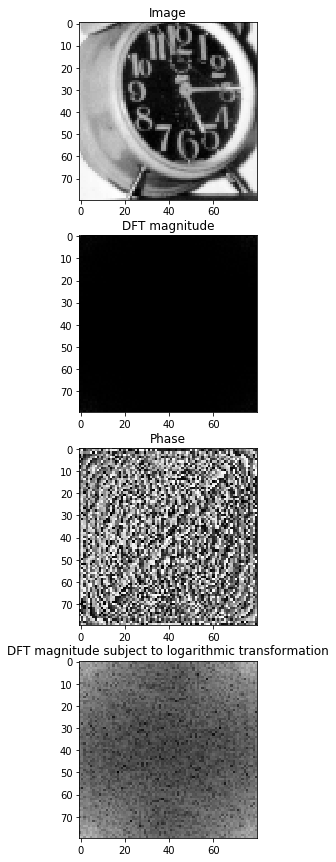

In [36]:
DFT_coefficients_matrix_mat_mul = DFT_using_matrix_multiplication(clock_cropped)
magnitude_img = np.absolute(DFT_coefficients_matrix_mat_mul)
phase_img = np.angle(DFT_coefficients_matrix_mat_mul)
log_compressed_image = log_compression(magnitude_img)
fscs_image = FSCS(log_compressed_image)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(4,1,1)
ax.set_title('Image')
ax.imshow(clock_cropped)
ax = fig.add_subplot(4,1,2)
ax.set_title('DFT magnitude')
ax.imshow(magnitude_img)
ax = fig.add_subplot(4,1,3)
ax.set_title('Phase')
ax.imshow(phase_img)
ax = fig.add_subplot(4,1,4)
ax.set_title('DFT magnitude subject to logarithmic transformation')
ax.imshow(fscs_image)

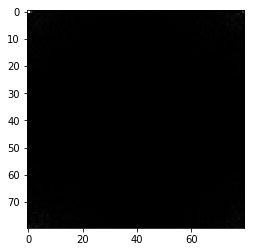

In [37]:
centered_DFT_image = centered_DFT(DFT_coefficients_matrix_mat_mul)
centered_DFT_magnitude_img = np.absolute(centered_DFT_image)
plt.imshow(centered_DFT_magnitude_img)

In [38]:
idft_dft_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix_mat_mul)

In [39]:
if difference_of_image(idft_dft_image, clock_cropped):
    print("Images are same")

Images are same


In [40]:
phase_transpose = np.transpose(phase_img)

In [41]:
# generating DFT using same magnitude but transpose of phase
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, phase_transpose)

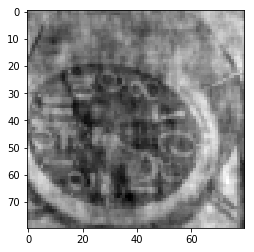

In [42]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is transposed, image almost lost all its details. It appears to be transposed
a little like it appears to be rotated anticlockwise by 90 degree but almost all details are lost

In [43]:
# Calculating DFT using same magnitude but zero phase
height, width = clock_cropped.shape[0], clock_cropped.shape[1]
zero_phase = np.zeros((height, width))
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, zero_phase)

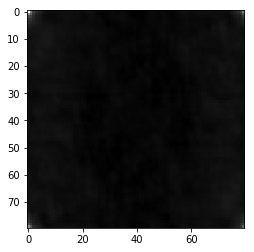

In [44]:
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is zero, the new synthesized image is black. Hence phase is very important 
in image.

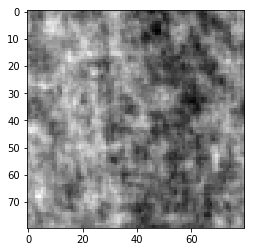

In [45]:
# Adding noise to phase
noise = np.random.normal(0, 2, size=(clock_cropped.shape[0], clock_cropped.shape[1]))
noisy_phase = np.add(phase_img, noise)
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, noisy_phase)
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed in above image, image lost all its details if noisy phase is added.

On second image - Airplane

In [46]:
DFT_coefficients_matrix = DFT(airplane_cropped)

In [47]:
magnitude_img = np.absolute(DFT_coefficients_matrix)

In [48]:
phase_img = np.angle(DFT_coefficients_matrix)

In [49]:
log_compressed_image = log_compression(magnitude_img)
fscs_image = FSCS(log_compressed_image)

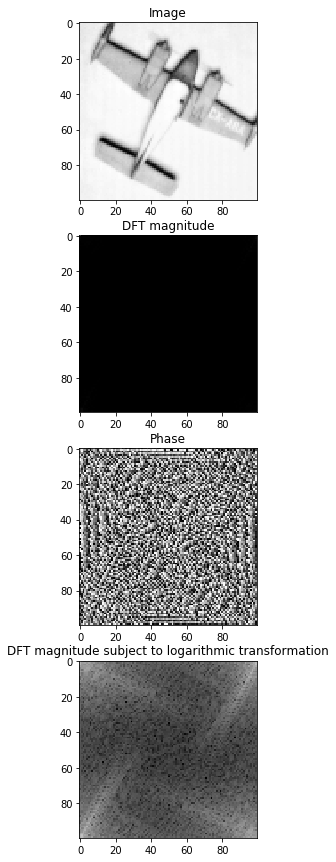

In [50]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(4,1,1)
ax.set_title('Image')
ax.imshow(airplane_cropped)
ax = fig.add_subplot(4,1,2)
ax.set_title('DFT magnitude')
ax.imshow(magnitude_img)
ax = fig.add_subplot(4,1,3)
ax.set_title('Phase')
ax.imshow(phase_img)
ax = fig.add_subplot(4,1,4)
ax.set_title('DFT magnitude subject to logarithmic transformation')
ax.imshow(fscs_image)

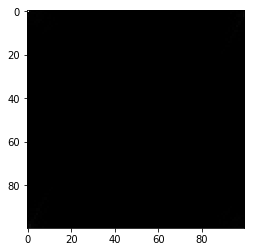

In [51]:
centered_DFT_image = centered_DFT(DFT_coefficients_matrix)
centered_DFT_magnitude_img = np.absolute(centered_DFT_image)
plt.imshow(centered_DFT_magnitude_img)

In [52]:
idft_dft_image = IDFT(DFT_coefficients_matrix)

In [53]:
if difference_of_image(idft_dft_image, airplane_cropped):
    print("Images are same")

Images are same


In [54]:
phase_transpose = np.transpose(phase_img)

In [55]:
# generating DFT using same magnitude but transpose of phase
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, phase_transpose)

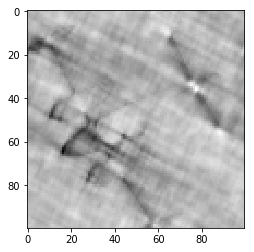

In [56]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

When phase is transposed, as observed above, the image lost all its details.

In [57]:
# Calculating DFT using same magnitude but zero phase
height, width = airplane_cropped.shape[0], airplane_cropped.shape[1]
zero_phase = np.zeros((height, width))
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, zero_phase)

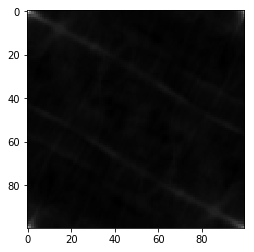

In [58]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is zero, the new synthesized image is black. Hence phase is very important 
in image.

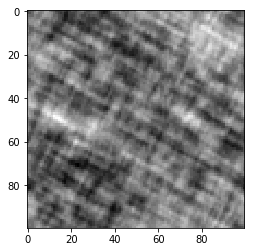

In [59]:
# Adding noise to phase
noise = np.random.normal(0, 2, size=(airplane_cropped.shape[0], airplane_cropped.shape[1]))
noisy_phase = np.add(phase_img, noise)
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, noisy_phase)
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed in above image, image lost all its details if noisy phase is added.

Performing same operations as above but DFT calculated using matrix multiplication

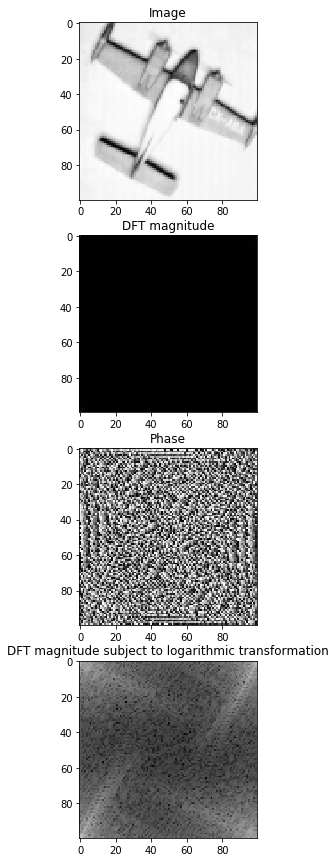

In [60]:
DFT_coefficients_matrix_mat_mul = DFT_using_matrix_multiplication(airplane_cropped)
magnitude_img = np.absolute(DFT_coefficients_matrix_mat_mul)
phase_img = np.angle(DFT_coefficients_matrix_mat_mul)
log_compressed_image = log_compression(magnitude_img)
fscs_image = FSCS(log_compressed_image)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(4,1,1)
ax.set_title('Image')
ax.imshow(airplane_cropped)
ax = fig.add_subplot(4,1,2)
ax.set_title('DFT magnitude')
ax.imshow(magnitude_img)
ax = fig.add_subplot(4,1,3)
ax.set_title('Phase')
ax.imshow(phase_img)
ax = fig.add_subplot(4,1,4)
ax.set_title('DFT magnitude subject to logarithmic transformation')
ax.imshow(fscs_image)

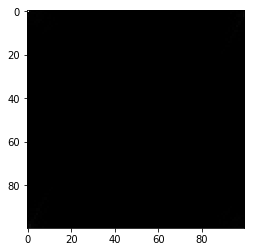

In [61]:
centered_DFT_image = centered_DFT(DFT_coefficients_matrix_mat_mul)
centered_DFT_magnitude_img = np.absolute(centered_DFT_image)
plt.imshow(centered_DFT_magnitude_img)

In [62]:
idft_dft_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix_mat_mul)

In [63]:
if difference_of_image(idft_dft_image, airplane_cropped):
    print("Images are same")

Images are same


In [64]:
phase_transpose = np.transpose(phase_img)

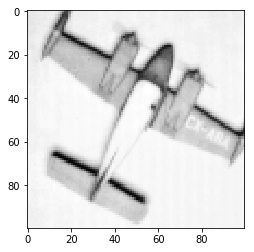

In [65]:
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix_mat_mul)
plt.imshow(new_image.real)

In [66]:
# Calculating DFT using same magnitude but zero phase
height, width = airplane_cropped.shape[0], airplane_cropped.shape[1]
zero_phase = np.zeros((height, width))
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, zero_phase)

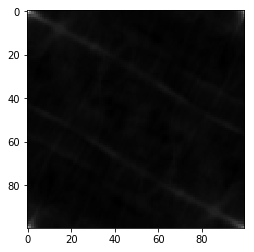

In [67]:
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is zero, the new synthesized image is black. Hence phase is very important 
in image.

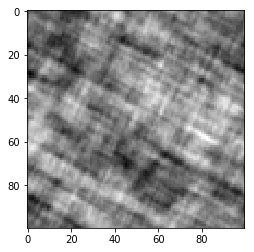

In [68]:
# Adding noise to phase
noise = np.random.normal(0, 2, size=(airplane_cropped.shape[0], airplane_cropped.shape[1]))
noisy_phase = np.add(phase_img, noise)
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, noisy_phase)
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed in above image, image lost all its details if noisy phase is added.

On Third image - chemical plant

In [70]:
DFT_coefficients_matrix = DFT(chemical_plant_cropped)

In [71]:
magnitude_img = np.absolute(DFT_coefficients_matrix)

In [72]:
phase_img = np.angle(DFT_coefficients_matrix)

In [73]:
log_compressed_image = log_compression(magnitude_img)
fscs_image = FSCS(log_compressed_image)

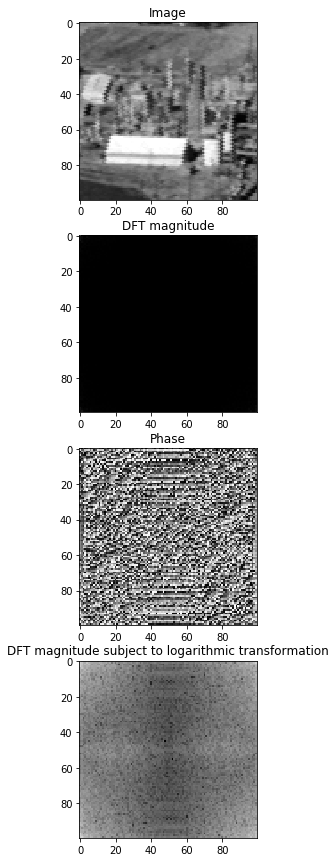

In [74]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(4,1,1)
ax.set_title('Image')
ax.imshow(chemical_plant_cropped)
ax = fig.add_subplot(4,1,2)
ax.set_title('DFT magnitude')
ax.imshow(magnitude_img)
ax = fig.add_subplot(4,1,3)
ax.set_title('Phase')
ax.imshow(phase_img)
ax = fig.add_subplot(4,1,4)
ax.set_title('DFT magnitude subject to logarithmic transformation')
ax.imshow(fscs_image)

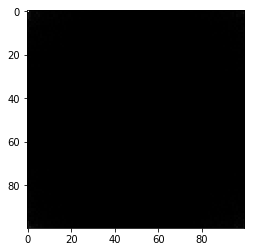

In [75]:
centered_DFT_image = centered_DFT(DFT_coefficients_matrix)
centered_DFT_magnitude_img = np.absolute(centered_DFT_image)
plt.imshow(centered_DFT_magnitude_img)

In [76]:
idft_dft_image = IDFT(DFT_coefficients_matrix)

In [77]:
if difference_of_image(idft_dft_image, chemical_plant_cropped):
    print("Images are same")

Images are same


In [78]:
phase_transpose = np.transpose(phase_img)

In [79]:
# generating DFT using same magnitude but transpose of phase
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, phase_transpose)

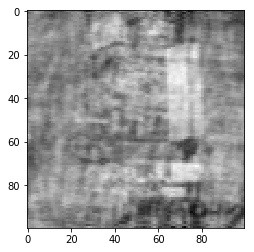

In [80]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is transposed, image almost lost all its details.

In [81]:
# Calculating DFT using same magnitude but zero phase
height, width = chemical_plant_cropped.shape[0], chemical_plant_cropped.shape[1]
zero_phase = np.zeros((height, width))
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, zero_phase)

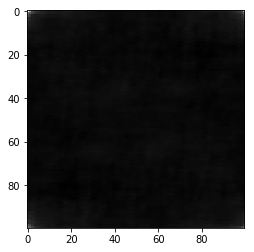

In [82]:
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is zero, the new synthesized image is black. Hence phase is very important 
in image.

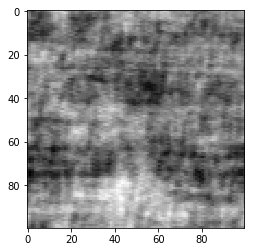

In [83]:
# Adding noise to phase
noise = np.random.normal(0, 2, size=(chemical_plant_cropped.shape[0], chemical_plant_cropped.shape[1]))
noisy_phase = np.add(phase_img, noise)
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, noisy_phase)
new_image = IDFT(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed in above image, image lost all its details if noisy phase is added.

Performing same operations as above but DFT calculated using matrix multiplication

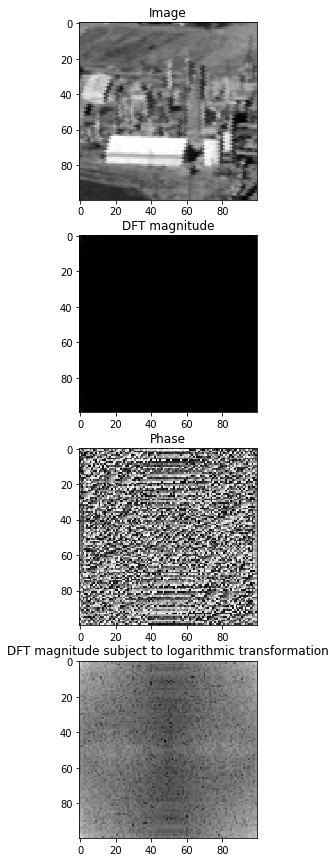

In [85]:
DFT_coefficients_matrix_mat_mul = DFT_using_matrix_multiplication(chemical_plant_cropped)
magnitude_img = np.absolute(DFT_coefficients_matrix_mat_mul)
phase_img = np.angle(DFT_coefficients_matrix_mat_mul)
log_compressed_image = log_compression(magnitude_img)
fscs_image = FSCS(log_compressed_image)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(4,1,1)
ax.set_title('Image')
ax.imshow(chemical_plant_cropped)
ax = fig.add_subplot(4,1,2)
ax.set_title('DFT magnitude')
ax.imshow(magnitude_img)
ax = fig.add_subplot(4,1,3)
ax.set_title('Phase')
ax.imshow(phase_img)
ax = fig.add_subplot(4,1,4)
ax.set_title('DFT magnitude subject to logarithmic transformation')
ax.imshow(fscs_image)

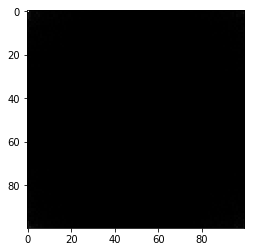

In [86]:
centered_DFT_image = centered_DFT(DFT_coefficients_matrix_mat_mul)
centered_DFT_magnitude_img = np.absolute(centered_DFT_image)
plt.imshow(centered_DFT_magnitude_img)

In [87]:
idft_dft_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix_mat_mul)

In [88]:
if difference_of_image(idft_dft_image, chemical_plant_cropped):
    print("Images are same")

Images are same


In [89]:
phase_transpose = np.transpose(phase_img)

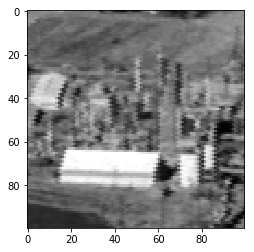

In [90]:
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix_mat_mul)
plt.imshow(new_image.real)

In [91]:
# DFT using same magnitude but transpose of phase
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, phase_transpose)

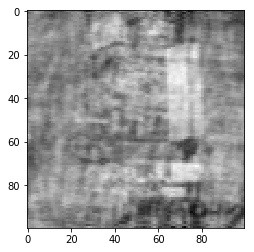

In [92]:
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is transposed, image almost lost all its details.

In [93]:
# Calculating DFT using same magnitude but zero phase
height, width = chemical_plant_cropped.shape[0], chemical_plant_cropped.shape[1]
zero_phase = np.zeros((height, width))
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, zero_phase)

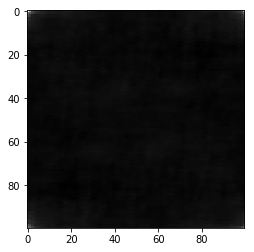

In [94]:
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed above, when phase is zero, the new synthesized image is black. Hence phase is very important 
in image.

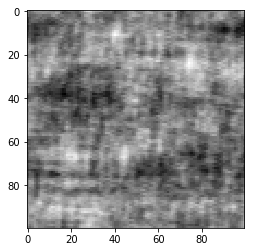

In [95]:
# Adding noise to phase
noise = np.random.normal(0, 2, size=(chemical_plant_cropped.shape[0], chemical_plant_cropped.shape[1]))
noisy_phase = np.add(phase_img, noise)
DFT_coefficients_matrix = DFT_given_magnitude_phase(magnitude_img, noisy_phase)
new_image = IDFT_using_matrix_multiplication(DFT_coefficients_matrix)
plt.imshow(new_image.real)

As observed in above image, image lost all its details if noisy phase is added.

# 2) Periodic Convolution

Write a program to do the following:
1. Circulary convolve two images. Test your program by using an image and an averaging filter of size 5 × 5.

In [96]:
# pad image with zeros to right and bottom to match new height and width
def zero_padding_right_bottom(image, new_height, new_width):
    height, width = image.shape[0], image.shape[1]
    padded_image = np.zeros((new_height, new_width))
    for row in range(height):
        for col in range(width):
            padded_image[row][col] = image[row][col]
    return padded_image

In [97]:
# circular convolution of given images
def cicular_convolution(img_1, img_2):
    # small sized image first
    if img_1.shape[0] > img_2.shape[0]:
        img_1, img_2 = img_2, img_1
    circular_convolved_image = np.zeros((img_2.shape[0], img_2.shape[1]))
    # making size of smaller image equal to size of larger image
    img_1 = zero_padding_right_bottom(img_1, img_2.shape[0], img_2.shape[1])
    height_1, width_1 = img_1.shape[0], img_1.shape[1]
    height_2, width_2 = img_2.shape[0], img_2.shape[1]
    for i in range(height_1):
        #print(i, end=' ')
        for j in range(width_1):
            for p in range(height_2):
                for q in range(width_2):
                    x = (i-p)%height_1
                    y = (j-q)%width_1
                    circular_convolved_image[i][j] += img_1[x][y]*img_2[p][q]
    return circular_convolved_image

In [98]:
averaging_filter = np.full((5, 5), 1/25)

In [99]:
circular_convolved_image = cicular_convolution(averaging_filter, clock_cropped)

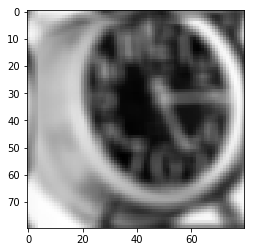

In [100]:
plt.imshow(circular_convolved_image)

2. Linearly convolve the same image and filter using the circular convolution function above after appropriate
zero padding.

Cropping clock image more since futher operations are computationally expensive

(50, 50)


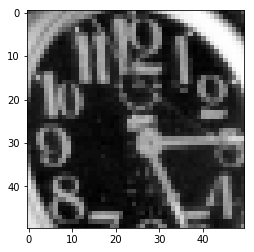

In [101]:
clock_cropped = clock[100:150, 160:210]
plt.imshow(clock_cropped)
print(clock_cropped.shape)

In [102]:
# linear convolution of given two images
def linear_convolution(img_1, img_2):
    # small sized image first
    if img_1.shape[0] > img_2.shape[0]:
        img_1, img_2 = img_2, img_1
    # padding smaller sized image to make its size equal to larger image
    img_1 = zero_padding_right_bottom(img_1, img_2.shape[0], img_2.shape[1])
    height_1, width_1 = img_1.shape[0], img_1.shape[1]
    height_2, width_2 = img_2.shape[0], img_2.shape[1]
    
    # doubling sizes of both images by padding with zeros to avoid
    # wraparound effect
    doubled_img_1 = zero_padding_right_bottom(img_1, 2*height_1, 2*width_1)
    doubled_img_2 = zero_padding_right_bottom(img_2, 2*height_2, 2*width_2)
    # circular convolution of both padded images to get linear convoluted image
    linear_convolved_image = cicular_convolution(doubled_img_1, doubled_img_2)
    return linear_convolved_image

In [103]:
linear_convolved_image = linear_convolution(averaging_filter, clock_cropped)

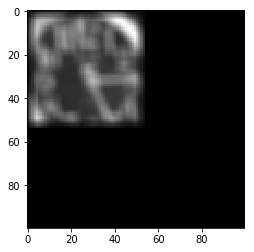

In [104]:
plt.imshow(linear_convolved_image)

As observed in above image, object of interest lies from (0,0) to (n-1, n-1)

3. Now, verify that you can perform linear covolution using the DFT of zero padded images.

Taking DFT of both images after doing zero padding and doing pointwise multiplication 
of both DFTs and taking IDFT

In [105]:
padded_filter = zero_padding_right_bottom(averaging_filter, clock_cropped.shape[0],clock_cropped.shape[1])
doubled_image = zero_padding_right_bottom(clock_cropped, 2*clock_cropped.shape[0], 2*clock_cropped.shape[1])
doubled_filter = zero_padding_right_bottom(padded_filter, 2*padded_filter.shape[0], 2*padded_filter.shape[1])
dft_image = DFT_using_matrix_multiplication(doubled_image)
dft_filter = DFT_using_matrix_multiplication(doubled_filter)
dft = np.multiply(dft_filter, dft_image)
final_image = IDFT_using_matrix_multiplication(dft)

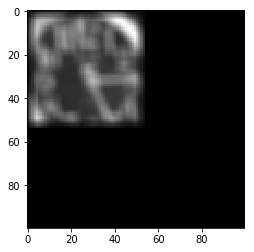

In [106]:
plt.imshow(final_image.real)

In [107]:
if difference_of_image(linear_convolved_image, final_image):
    print("Linear convolution by circular convolving padded images and by Pointwise DFT multiplication and then taking IDFT are same")

Linear convolution by circular convolving padded images and by Pointwise DFT multiplication and then taking IDFT are same


As we can see from above, we can perform linear covolution using the DFT of zero padded images.

In [108]:
# direct linear convolution
def direct_linear_convolution(img_1, img_2):
    if img_1.shape[0] > img_2.shape[0]:
        img_1, img_2 = img_2, img_1
    img_1 = zero_padding_right_bottom(img_1, img_2.shape[0], img_2.shape[1])
    height_1, width_1 = img_1.shape[0], img_1.shape[1]
    height_2, width_2 = img_2.shape[0], img_2.shape[1]
    linear_convoluted_image = np.zeros((height_1, width_1))
    for i in range(height_1):
        #print(i, end=' ')
        for j in range(width_1):
            for m in range(height_2):
                for n in range(width_2):
                    x = i-m if (i-m)>=0 else 0
                    y = j-n if (j-n)>=0 else 0
                    linear_convoluted_image[i][j] += img_1[m][n]*img_2[x][y]
    return linear_convoluted_image

In [109]:
padded_filter = zero_padding_right_bottom(averaging_filter, clock_cropped.shape[0],clock_cropped.shape[1])
direct_convoluted_image = direct_linear_convolution(padded_filter, clock_cropped)

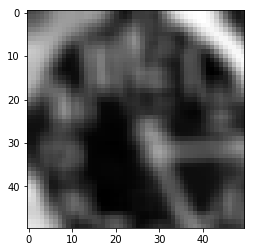

In [110]:
plt.imshow(direct_convoluted_image)

# 3) Image Denoising using Linear Filters

In this problem you will denoise images using the linear filtering techniques discussed in class. Use additive white
Gaussian noise (AWGN) with zero mean and variance σ 2 = 25. Write a program to denoise the image using the
following techniques:

1. Average filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between
denoising and smoothing. What could be an appropriate window size for this noise level?

In [111]:
filter_sizes = [3,5,7,9,11,13,15]

In [112]:
# average filter 
def average_filter(size):
    height, width = size, size
    average_filter_image = np.full((height, width), 1/(size*size))
    return average_filter_image

In [113]:
# denoising image using average filter by linear convolution
# of given filter and noisy image
def denoise_using_average_filter(filter, image):
    denoised_image = linear_convolution(filter, image)
    return denoised_image

In [114]:
# adding normal distributed noise with given mean and standard deviation to image
def get_noisy_image(image, mean, std_dev):
    height, width = image.shape[0], image.shape[1]
    noisy_image = np.zeros((height, width), dtype='float')
    noise = np.random.normal(mean, std_dev, size=(height, width))
    noisy_image = np.add(image, noise)
    return noisy_image

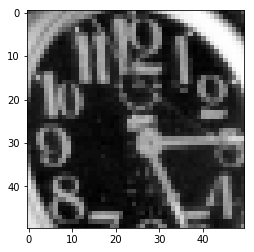

In [115]:
plt.imshow(clock_cropped)

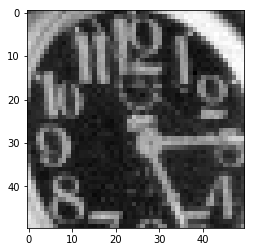

In [116]:
noisy_image = get_noisy_image(clock_cropped, 0, 5)
plt.imshow(noisy_image)

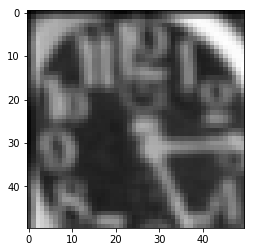

In [117]:
filter_size = 3
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

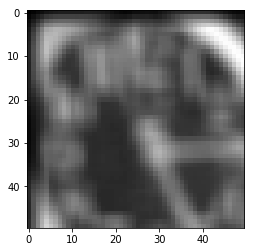

In [118]:
filter_size = 5
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

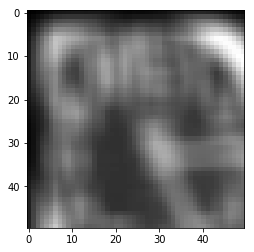

In [119]:
filter_size = 7
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

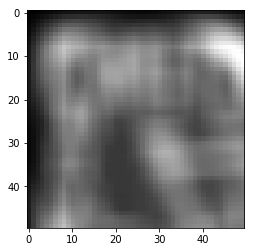

In [120]:
filter_size = 9
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

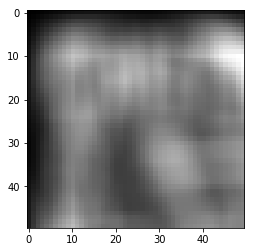

In [121]:
filter_size = 11
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

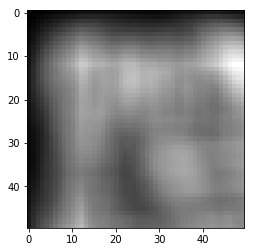

In [122]:
filter_size = 13
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

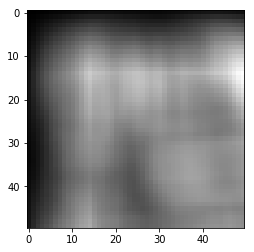

In [123]:
filter_size = 15
average_filter_image = average_filter(filter_size)
denoised_image = linear_convolution(average_filter_image, noisy_image)
# since our object of interest lies in (0,0) to (n-1,n-1)
# hence slicing till half of image width and height
denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
plt.imshow(denoised_image)

As we can observe in above images, applying average filter results in smoothing of noise but 
for filter size of 3, image has retained its details. But for larger filter sizes,
image smoothing happened more than noise smoothing. Hence details are lost for 
filter size greater than 3. This also is because image size is very small (50*50).
But if image size is more, then large filter size may smoothen the noise retaining details.
Best window size is observed to be 3.

2. Gaussian filter of size 5 × 5. Experiment with the standard deviation σ h of the filter from 0.5 to 5 in steps of 0.5 and observe its effect on denoising.

In [124]:
# generating gaussian filter given filter size and sigma value
def get_gaussian_filter(sigma, filter_size):
    filter_height, filter_width = filter_size[0], filter_size[1]
    filter_dft_coefficients = np.zeros((filter_height, filter_width))
    for row in range(filter_height):
        for col in range(filter_width):
            filter_dft_coefficients[row][col] = np.exp(-2*(math.pi**2)*(sigma**2)*(((row**2)+(col**2))/(filter_height**2)))
    gaussian_filter = IDFT_using_matrix_multiplication(filter_dft_coefficients)
    return gaussian_filter.real

In [125]:
# gaussian_filter = get_gaussian_filter(0.5, (5,5))
# # since our object of interest lies in (0,0) to (n-1,n-1)
# # hence slicing till half of image width and height
# denoised_image = linear_convolution(gaussian_filter, noisy_image)
# denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
# plt.imshow(denoised_image)

In [126]:
sigma_values = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

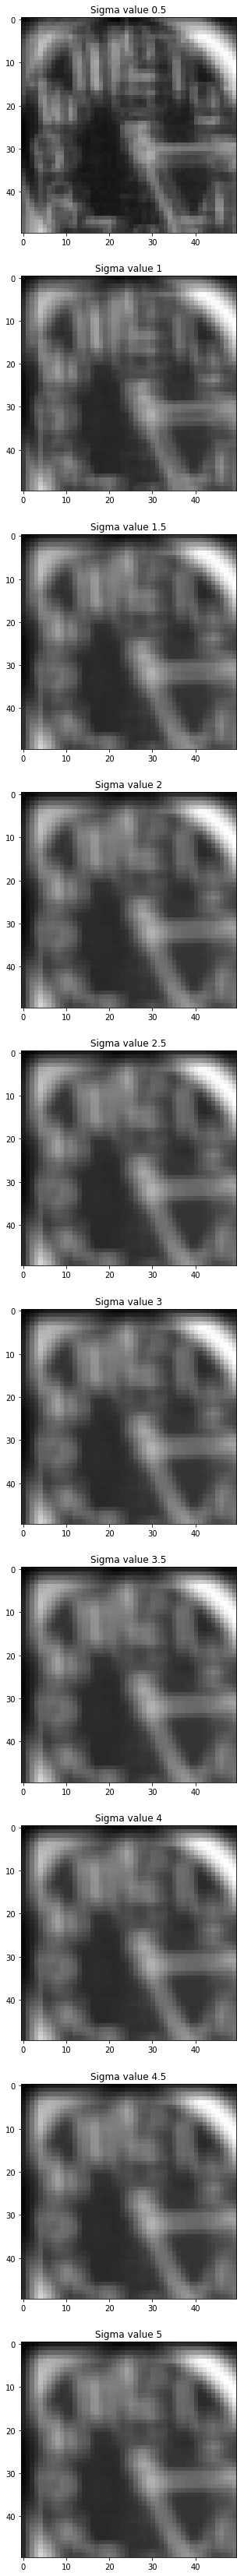

In [127]:
fig = plt.figure(figsize = (10,60))
for i in range(len(sigma_values)):
    sigma = sigma_values[i]
    # getting gaussian filter of given sigma value
    gaussian_filter = get_gaussian_filter(sigma, (5,5))
    # linear convolution of gaussian filter and noisy image
    denoised_image = linear_convolution(gaussian_filter, noisy_image)
    # since our object of interest lies in (0,0) to (n-1,n-1)
    # hence slicing till half of image width and height
    denoised_image = denoised_image[:denoised_image.shape[0]//2,:denoised_image.shape[1]//2]
    ax = fig.add_subplot(10,1,i+1)
    ax.set_title('Sigma value ' + str(sigma))
    ax.imshow(denoised_image)

As we can see in above images, gaussian filter of sigma value 0.5 have some details, rest filters with 
sigmal value greater than 0.5 have all lost details i.e. smoothened image too much. Although image is shaky
too for filter of sigma value 0.5 but is better than others. This may happen due to small size of image 
and considerable size of filter. It may give good results for large image sizes.